In [2]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
data = pd.read_csv('./winequality-white.csv', sep=';')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


What features are in the dataset?

* fixed acidity. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

* Volatile acidity is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

* citric acid - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

* residual sugar is that grape sugar that has not been fermented in alcohol

* chlorides. The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità).
Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

* free sulfur dioxide, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.


* Density - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

* pH is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

* Sulfates are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

* alcohol - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

* quality is a target.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Before Preprocessing

In [10]:
data.columns = data.columns.str.replace(' ', '_')

missing values

In [17]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

duplicated values

In [22]:
data.duplicated().sum() # 937 duplicated values
data.drop_duplicates(inplace=True)

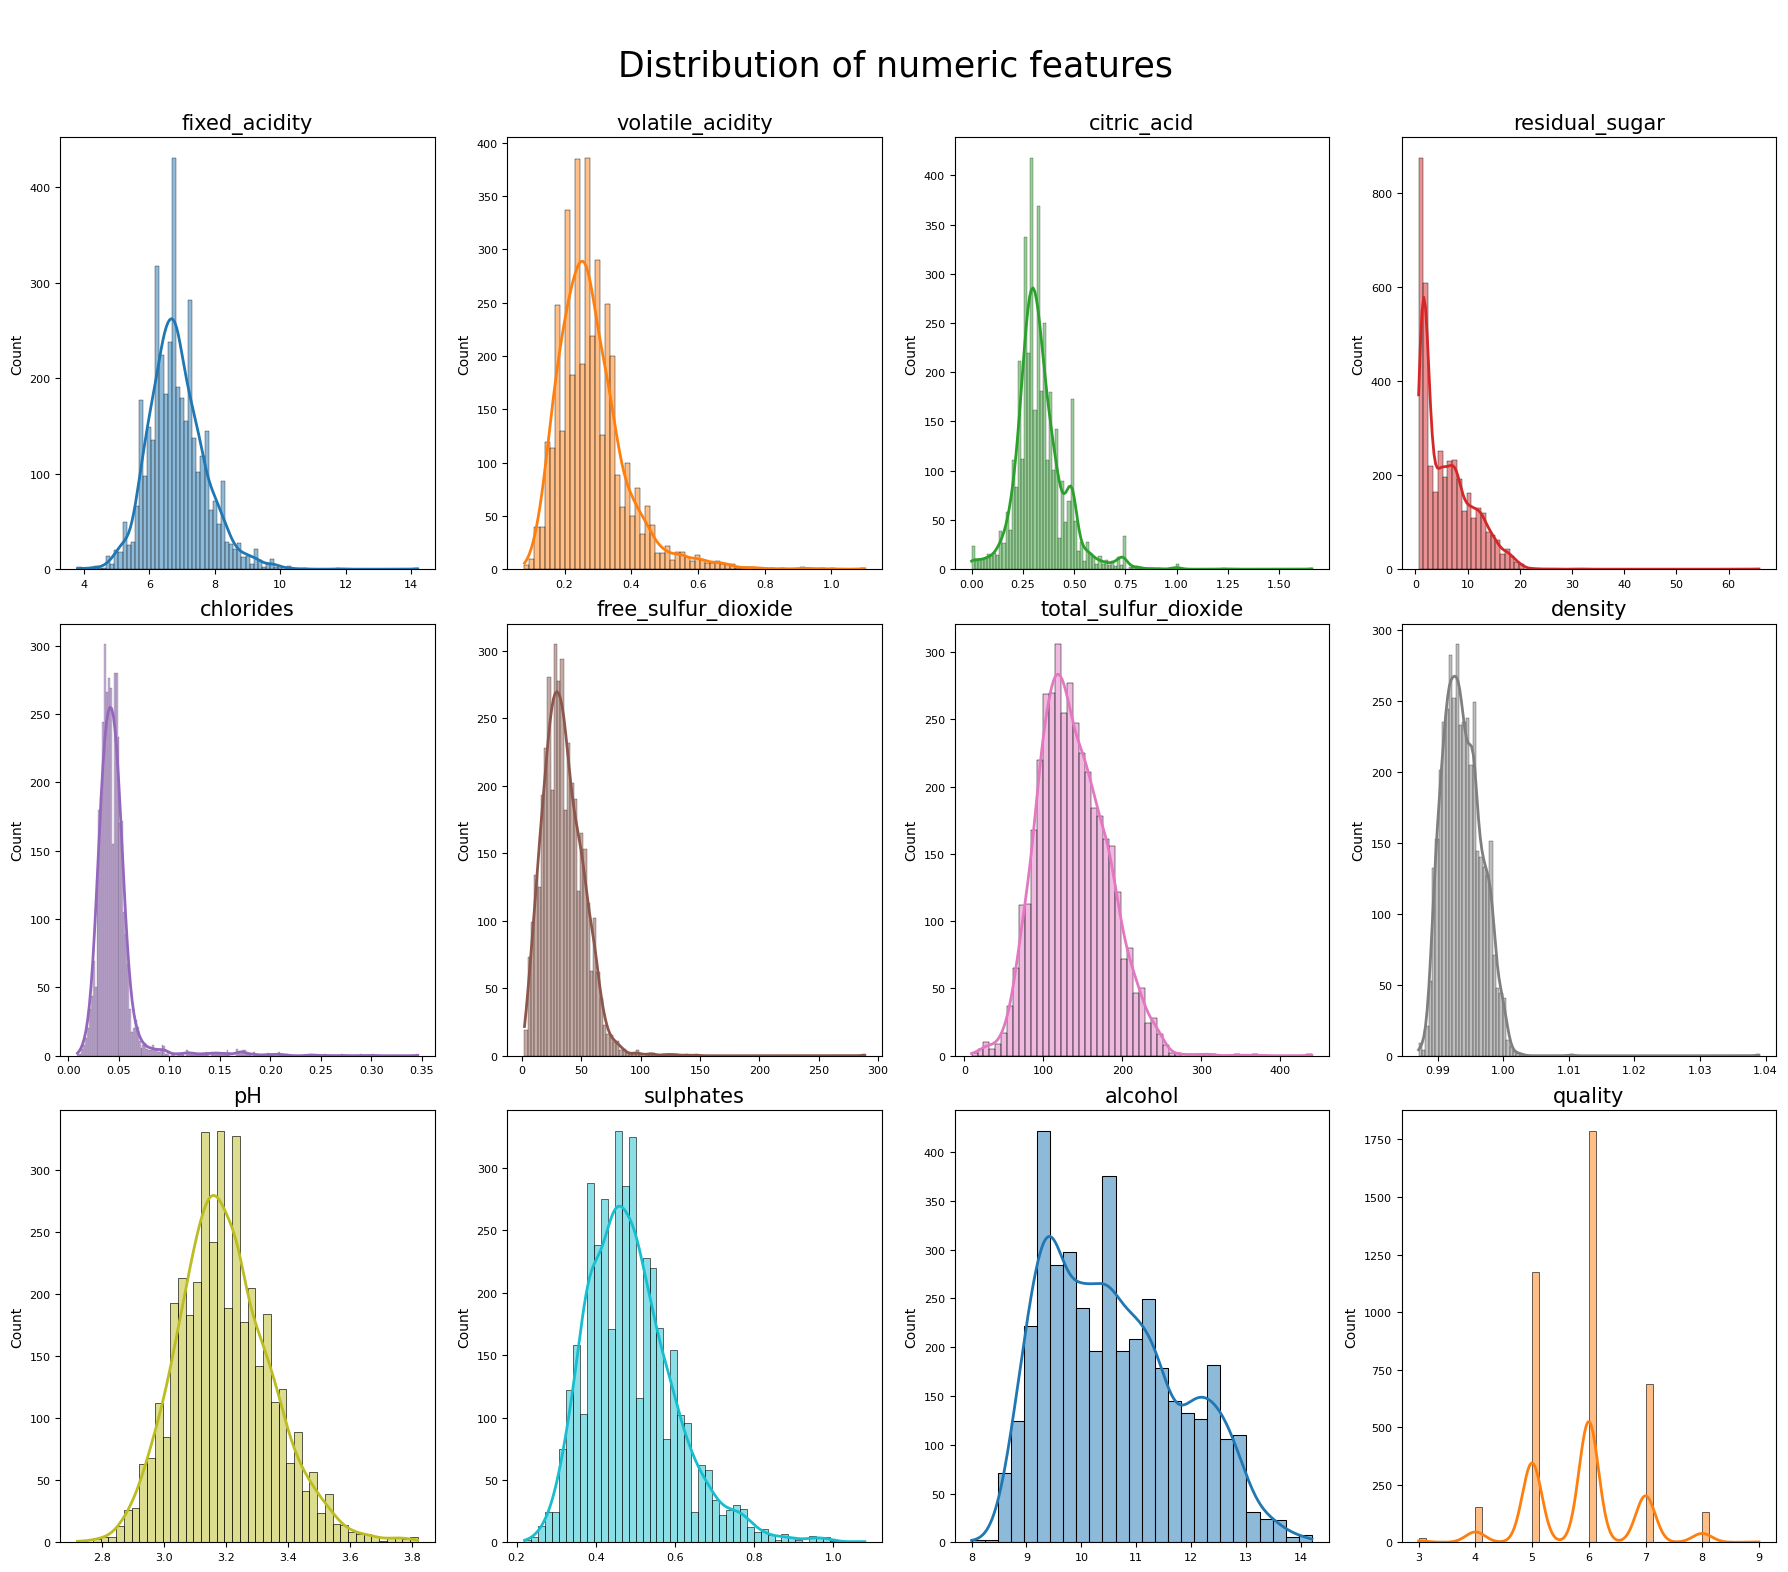

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18,16))
axes = axes.flat

for i, column in enumerate(data):
    sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        ax      = axes[i]
    )
    axes[i].set_title(column, fontsize = 15)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('\nDistribution of numeric features', fontsize = 25);

Target distribution

In [44]:
qualitybox = px.box(data_frame=data, x='quality', y='alcohol', color='quality')
qualitybox.show()
